In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
df=pd.read_csv('C:/Users/Administrator/OneDrive/Desktop/Data Projects/Toyota stock data 2025.csv')

In [5]:
df.shape

(11414, 7)

In [7]:
df.describe()

,date,open,high,low,close,adj_close,volume
count,11413,11414,11414,11414,11414,11414,11414
unique,11413,4894,5798,5787,5950,7757,5826
top,1980-03-17,0.0,7.317633152008057,7.228393077850342,7.228393077850342,4.060840606689453,0
freq,1,2981,37,36,36,36,133


In [9]:
df.isna().sum()

date         1
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

In [11]:
df = df.dropna(subset=['date'])


In [13]:
df.isna().sum()

date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

In [15]:
# Remove whitespace and make all column names lowercase
df.columns = df.columns.str.strip().str.lower()

# Now check again
print(df.columns)

Index(['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume'], dtype='object')


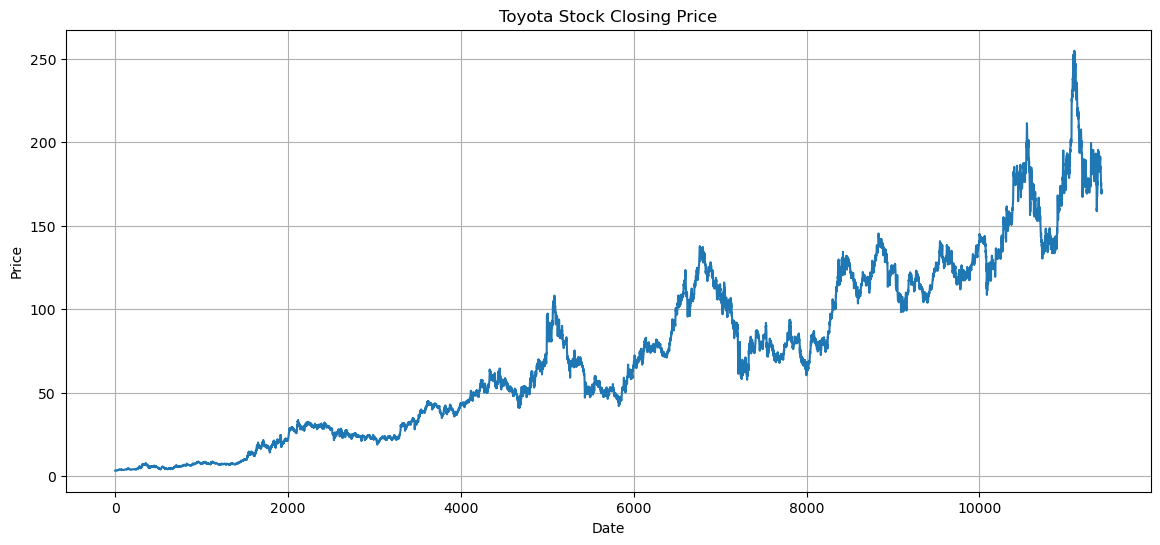

In [26]:
df['close'].plot(figsize=(14, 6), title='Toyota Stock Closing Price')
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

In [ ]:
print(df.dtypes)

In [24]:
# Convert columns to numeric if they aren't already
cols_to_convert = ['open', 'high', 'low', 'close', 'adj_close', 'volume']
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
    

In [28]:
df = df.dropna(subset=['close'])

In [30]:
print(df.dtypes)

date          object
open         float64
high         float64
low          float64
close        float64
adj_close    float64
volume         int64
dtype: object


In [32]:
X = df[['open', 'high', 'low', 'volume']]
y = df['close']


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)


In [36]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [38]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


RMSE: 0.54
R²: 1.00


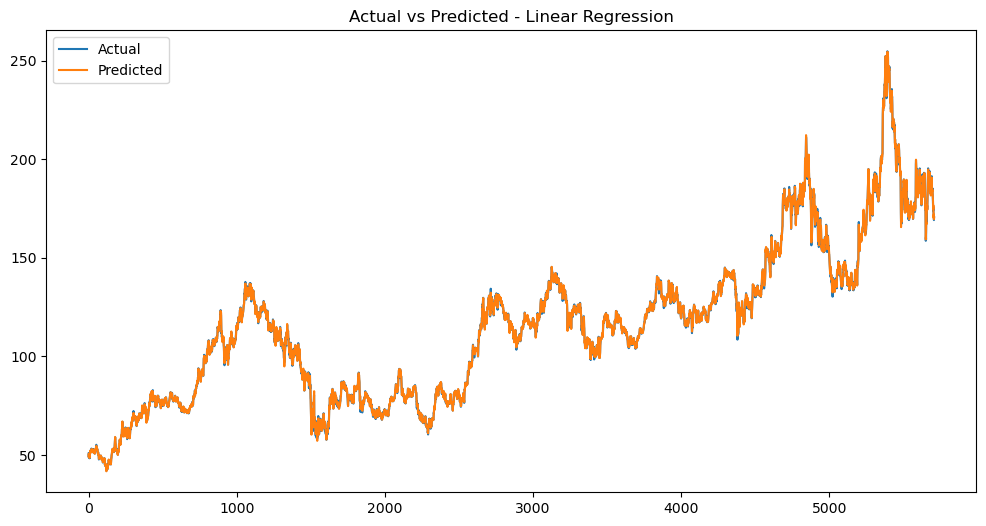

In [40]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted - Linear Regression")
plt.show()


In [42]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [45]:
rf_pred = rf_model.predict(X_test)

rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest RMSE: {rf_rmse:.2f}")
print(f"Random Forest R²: {rf_r2:.2f}")


Random Forest RMSE: 33.63
Random Forest R²: 0.25


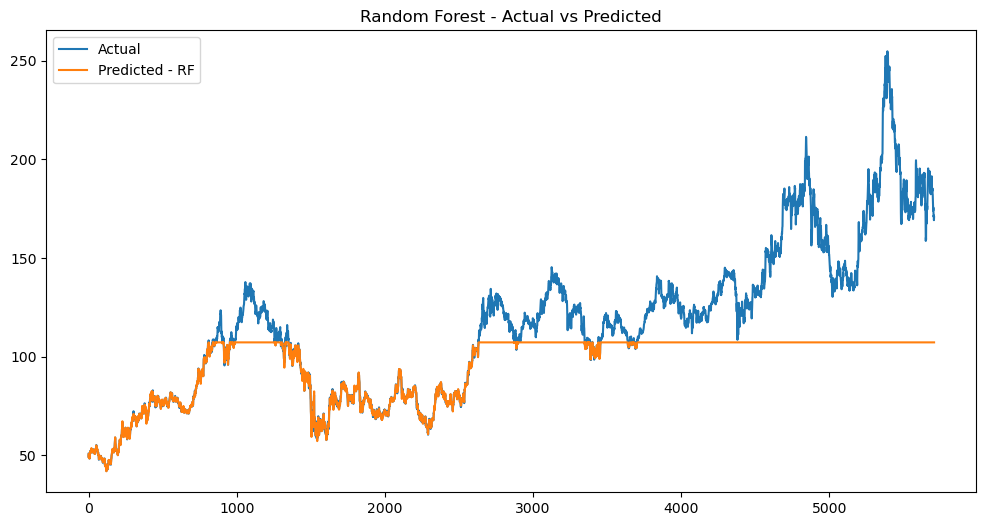

In [46]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual')
plt.plot(rf_pred, label='Predicted - RF')
plt.legend()
plt.title("Random Forest - Actual vs Predicted")
plt.show()


In [47]:
importances = rf_model.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")


open: 0.2553
high: 0.1786
low: 0.5661
volume: 0.0000


In [48]:
df['Prev_close'] = df['close'].shift(1)
df = df.dropna()

In [54]:
X = df[['open', 'high', 'low', 'volume', 'Prev_close']]
y = df['close']

In [56]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [57]:
rf_pred = rf_model.predict(X_test)

rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest RMSE: {rf_rmse:.2f}")
print(f"Random Forest R²: {rf_r2:.2f}")

Random Forest RMSE: 33.63
Random Forest R²: 0.25


In [58]:
df['Prev_close'] = df['close'].shift(1)
df = df.dropna()

X = df[['open', 'high', 'low', 'volume', 'Prev_close']]
y = df['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [59]:
importances = rf_model.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")
    

open: 0.2553
high: 0.1786
low: 0.5661
volume: 0.0000


In [64]:
from xgboost import XGBRegressor

In [66]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [68]:
xgb_pred = xgb_model.predict(X_test)

xgb_rmse = mean_squared_error(y_test, xgb_pred, squared=False)
xgb_r2 = r2_score(y_test, xgb_pred)

print(f"XGBoost RMSE: {xgb_rmse:.2f}")
print(f"XGBoost R²: {xgb_r2:.2f}")


XGBoost RMSE: 28.82
XGBoost R²: 0.15


In [70]:
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [72]:
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)

xgb_rmse = mean_squared_error(y_test, xgb_pred, squared=False)
xgb_r2 = r2_score(y_test, xgb_pred)

print(f"XGBoost RMSE: {xgb_rmse:.2f}")
print(f"XGBoost R²: {xgb_r2:.2f}")

XGBoost RMSE: 28.75
XGBoost R²: 0.16


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

ModuleNotFoundError: No module named 'tensorflow.keras'

In [76]:
!pip show tensorflow

Name: tensorflow
Version: 2.19.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\ProgramData\anaconda3\Lib\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 
